In [ ]:
from IPython.display import display, HTML
html_content = """ <a id='1'></a> <center> <h3 style="background-color:purple; color:white"> <br>DRUGS SIDE EFFECTS AND MEDICAL CONDITIONS <br> </h3> </center> """
display(HTML(html_content))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IMPORT LIBRARIES

In [ ]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import openpyxl
from sklearn.preprocessing import LabelEncoder
from openpyxl.styles import PatternFill
import plotly.express as px
import scipy.stats as stats
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('"C:\Users\phani\Downloads\drugs_side_effects_drugs_com.csv"')
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [ ]:
df.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2931, 17)

In [ ]:
df.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [ ]:
df.info

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method DataFrame.info of            drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your...   
2927  hives ; difficult breathing; swelling of your ...   
2928                                                NaN   
2929  Imcivree may cause serious side effects, inclu...   
2930  hives ; difficult breathing; swelling of your ...   

                  generic_name  \
0                  doxycycline   
1               spironolactone   
2                  minocycline   
3          isotretinoin (oral)   
4          clindamycin topical   
...                        ...   
2926             benzphetamine   
2927              fenfluramine   
2928  phendimetrazine tartrate   
2929             setmelanotide   
2930             setmelanotide   

                                           drug_classes  \
0            Miscellaneous antimalarials, Tetracyclines   
1     Aldosterone receptor antagonists, Potassium-sp...   
2                                         Tetracyclines   
3     Miscellaneous antineoplastics, Miscellaneous u...   
4          Topical acne agents, Vaginal anti-infectives   
...                                                 ...   
2926                        Anorexiants, CNS stimulants   
2927  Anorexiants, CNS stimulants, Miscellaneous ant...   
2928                        Anorexiants, CNS stimulants   
2929                     Melanocortin receptor agonists   
2930                     Melanocortin receptor agonists   

                                            brand_names activity rx_otc  \
0     Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...      87%     Rx   
1                                   Aldactone, CaroSpir      82%     Rx   
2     Dynacin, Minocin, Minolira, Solodyn, Ximino, V...      48%     Rx   
3                                                   NaN      41%     Rx   
4     Cleocin T, Clindacin ETZ, Clindacin P, Clindag...      39%     Rx   
...                                                 ...      ...    ...   
2926                                    Didrex, Regimex       2%     Rx   
2927                                           Fintepla       1%     Rx   
2928                                                NaN       0%     Rx   
2929                                                NaN       0%     Rx   
2930                                           Imcivree       0%     Rx   

     pregnancy_category csa alcohol  \
0                     D   N       X   
1                     C   N       X   
2                     D   N     NaN   
3                     X   N       X   
4                     B   N     NaN   
...                 ...  ..     ...   
2926                  X   3       X   
2927                  C   4       X   
2928                  C   3       X   
2929                NaN   N     NaN   
2930                NaN   N     NaN   

                                          related_drugs  \
0     amoxicillin: https://www.drugs.com/amoxicillin...   
1     amlodipine: https://www.drugs.com/amlodipine.h...   
2     amoxicillin: https://www.drugs.com/amoxicillin...   
3     doxycycline: https://www

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
brand_names,1213
activity,0
rx_otc,1
pregnancy_category,229
csa,0


In [ ]:
# Print the total number of missing values
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')
for col in df.columns:
  print('\t%s: %d' % (col,df[col].isna().sum()))

There are 7405 missing values in this dataset
Number of instances = 2931
Number of attributes = 17
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	brand_names: 1213
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CLEANING THE DATA

In [ ]:
df.drop(columns=['brand_names'], inplace=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check duplicates
duplicate_rows= df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print("Count of Duplicate Rows:", duplicate_count)
print(duplicate_rows)

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert 'rating' and 'no_of_reviews' attributes to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],errors='coerce')
print(df.dtypes.value_counts())

object     14
float64     2
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert 'activity' to string, remove whitespace and '%'
df['activity'] = df['activity'].astype(str).str.replace(r'\s+', '',regex=True).str.rstrip('%').astype('float')/100
print(df['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In the alcohol column we have X and null(NaN) values, because the drug can interact with alcohol or not.
replacing alcohol column with boolean values.

Let X will be 1 of interaction, NaN will be 0.

In [ ]:
df['alcohol']=df['alcohol'].replace(np.NaN,'0')
df['alcohol']=df['alcohol'].replace({'X': 1})
print(df['alcohol'].head())

0    1
1    1
2    0
3    1
4    0
Name: alcohol, dtype: object


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fill the null values in 'side_effects' and 'related_drugs' with no
df["side_effects"] = df['side_effects'].fillna('Unknown')
df["related_drugs"] = df['related_drugs'].fillna('Unknown')
df['generic_name']=df['generic_name'].replace(np.NaN,'Unknown')
df['drug_classes']=df['drug_classes'].replace(np.NaN,'Unknown')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CHECK FOR CATERGORICAL VALUES

In [ ]:
df["rx_otc"].unique()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [ ]:
df["pregnancy_category"].unique()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [ ]:
df['rx_otc']=df['rx_otc'].replace(np.NaN, 'Unknown')
df['pregnancy_category']=df['pregnancy_category'].replace(np.NaN, 'Unknown')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'],errors='coerce')
print(df.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs=df.copy()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CHECK FOR MISSING VALUES

In [ ]:
print("There are {} missing values in this dataset".format(df.isnull().sum().sum()))
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')
for col in df.columns:
  print('\t%s: %d' % (col,df[col].isna().sum()))

There are 2690 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_version2=df.copy()
print(data_version2.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SAVE THE CLEANED DATA

In [ ]:
data_version2.to_csv('drugs_side_effects_version2.csv', index=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_ver3=pd.read_csv('drugs_side_effects_version2.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("pregnancy_category: ", data_ver3["pregnancy_category"].unique())
print("\n csa: ", data_ver3["csa"].unique())
print("\n rx_otc: ", data_ver3["rx_otc"].unique())
print("\n generic_name: ", data_ver3["generic_name"].unique())
print("\n medical_condition: ", data_ver3["medical_condition"].unique())

pregnancy_category:  ['D' 'C' 'X' 'B' 'N' 'Unknown' 'A']

 csa:  ['N' '2' '4' 'U' 'M' '5' '3']

 rx_otc:  ['Rx' 'Rx/OTC' 'OTC' 'Unknown']

 generic_name:  ['doxycycline' 'spironolactone' 'minocycline' ... 'fenfluramine'
 'phendimetrazine tartrate' 'setmelanotide']

 medical_condition:  ['Acne' 'ADHD' 'AIDS/HIV' 'Allergies' "Alzheimer's" 'Angina' 'Anxiety'
 'Asthma' 'Bipolar Disorder' 'Bronchitis' 'Cancer' 'Cholesterol'
 'Colds & Flu' 'Constipation' 'COPD' 'Covid 19' 'Depression'
 'Diabetes (Type 1)' 'Diabetes (Type 2)' 'Diarrhea' 'Eczema'
 'Erectile Dysfunction' 'Gastrointestinal' 'GERD (Heartburn)' 'Gout'
 'Hair Loss' 'Hayfever' 'Herpes' 'Hypertension' 'Hypothyroidism'
 'IBD (Bowel)' 'Incontinence' 'Insomnia' 'Menopause' 'Migraine'
 'Osteoarthritis' 'Osteoporosis' 'Pain' 'Pneumonia' 'Psoriasis'
 'Rheumatoid Arthritis' 'Schizophrenia' 'Seizures' 'Stroke' 'Swine Flu'
 'UTI' 'Weight Loss']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CATEGORICAL TO NUMERICAL

In [ ]:
label_encoder = LabelEncoder()
data_ver3["csa"]= label_encoder.fit_transform(data_ver3["csa"])
data_ver3["rx_otc"]= label_encoder.fit_transform(data_ver3["rx_otc"])
data_ver3["generic_name"] = label_encoder.fit_transform(data_ver3["generic_name"])
data_ver3["medical_condition"] = label_encoder.fit_transform(data_ver3["medical_condition"])
data_ver3["pregnancy_category"] = label_encoder.fit_transform(data_ver3["pregnancy_category"])
data_ver3["side_effects"] = label_encoder.fit_transform(data_ver3["side_effects"])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1=pd.DataFrame(data_ver3,columns=('generic_name','medical_condition', 'no_of_reviews', 'side_effects', 'rating','csa', 'pregnancy_category', 'rx_otc', 'alcohol'))
df1.head(10)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,642,2,760.0,15,6.8,5,3,1,1
1,1270,2,449.0,1972,7.2,5,2,1,1
2,1034,2,482.0,2697,5.7,5,3,1,0
3,903,2,623.0,2570,7.9,5,6,1,1
4,505,2,146.0,1260,7.4,5,1,1,0
5,1270,2,8.0,1971,7.6,5,2,1,1
6,1335,2,439.0,1895,7.7,5,2,1,0
7,903,2,999.0,2577,8.0,5,6,1,1
8,1276,2,96.0,2702,8.5,5,3,1,1
9,162,2,86.0,2405,7.9,5,2,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)
print(scaled_data)

[[-0.11111578 -1.43400434  3.70550542 ...  0.28892455 -0.17025661
   1.06232778]
 [ 1.50040103 -1.43400434  2.02299235 ... -0.43301735 -0.17025661
   1.06232778]
 [ 0.89479917 -1.43400434  2.20152267 ...  0.28892455 -0.17025661
  -0.94132905]
 ...
 [ 1.21043065  1.82918864         nan ... -0.43301735 -0.17025661
   1.06232778]
 [ 1.47217383  1.82918864         nan ...  1.73280834 -0.17025661
  -0.94132905]
 [ 1.47217383  1.82918864         nan ...  1.73280834 -0.17025661
  -0.94132905]]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1_std = pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
print(df1_std)

      generic_name  medical_condition  no_of_reviews  side_effects    rating  \
0        -0.111116          -1.434004       3.705505     -1.678954 -0.005590   
1         1.500401          -1.434004       2.022992      0.778579  0.167397   
2         0.894799          -1.434004       2.201523      1.689009 -0.481304   
3         0.558639          -1.434004       2.964334      1.529527  0.470124   
4        -0.462673          -1.434004       0.383759     -0.115526  0.253890   
...            ...                ...            ...           ...       ...   
2926     -0.832193           1.829189      -0.314132      0.757231  0.297137   
2927      0.112136           1.829189            NaN      0.370455       NaN   
2928      1.210431           1.829189            NaN     -1.029724       NaN   
2929      1.472174           1.829189            NaN     -1.175392       NaN   
2930      1.472174           1.829189            NaN      0.444545       NaN   

           csa  pregnancy_category    r

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


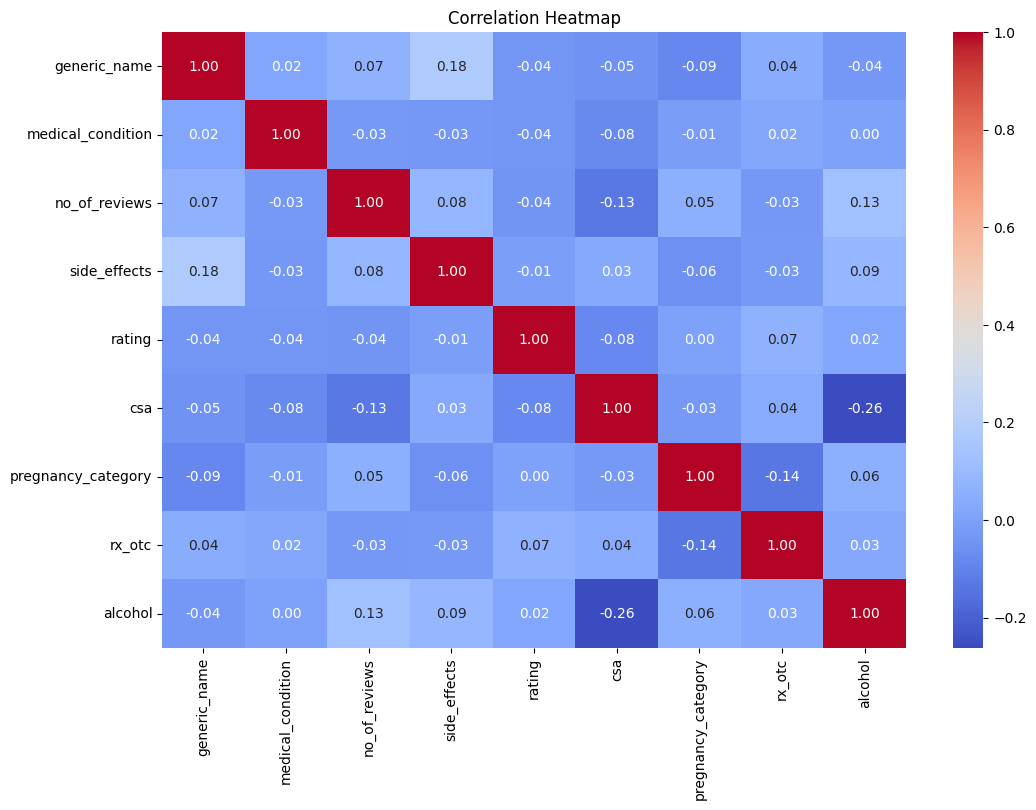

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from google.colab import files
files.download('/content/drugs_side_effects_version2.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_final_ver =pd.read_csv('drugs_side_effects_version2.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
medical_condition_counts = data_final_ver['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency (highest to lowest):")
print(medical_condition_counts)


Medical condition occurrence and frequency (highest to lowest):
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD                 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Split the text on semicolons then strip whitespace
def extract_side_effects(text):
  return [effect.strip() for effect in re.split(r'[;]',text)]
side_effects = data_final_ver['side_effects'].dropna().apply(extract_side_effects).explode()
side_effect_counts = side_effects.value_counts().sort_values(ascending=False)
print("\nSide effects occurrence and frequency (highest to lowest):")
print(side_effect_counts)


Side effects occurrence and frequency (highest to lowest):
side_effects
hives                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
side_effect_counts.to_csv('side_effect_counts.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# same as for abv
def extract_side_effects(text):
    effects = re.split(r'[;,]', str(text))  # Split by semicolon or comma
    cleaned_effects = [effect.strip() for effect in effects if len(effect.strip().split()) <= 6]  # Remove long sentences
    return cleaned_effects

# Process the side effects column
side_effects = data_final_ver['side_effects'].dropna().apply(extract_side_effects).explode()

# Count occurrences of each side effect
side_effect_counts = side_effects.value_counts().sort_values(ascending=False)

# Convert to DataFrame for structured display
side_effects_df = side_effect_counts.reset_index()
side_effects_df.columns = ['side_effects', 'count']
print("\nSide effects occurrence and frequency (highest to lowest):")
print(side_effects_df.head(1000))


Side effects occurrence and frequency (highest to lowest):
               side_effects  count
0                      lips   2273
1                    tongue   2129
2                     hives   1940
3     swelling of your face   1713
4       difficult breathing   1257
..                      ...    ...
995    nausea with vomiting      7
996       pain in your arms      7
997  neck pain or stiffness      7
998    very slow heartbeats      7
999           emtricitabine      7

[1000 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


extract drug classes from text, split by commas


In [ ]:
def extract_drug_classes(text):
  return [effect.strip() for effect in re.split(r'[,]',text)]
# Extract and count occurrences of drug classes
drug_classes = data_final_ver['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes.value_counts().sort_values(ascending=False)
print("\nDrug Classes occurrence and frequency (sorted fromhighest to lowest):")
print(drug_classes_counts)


Drug Classes occurrence and frequency (sorted fromhighest to lowest):
drug_classes
Upper respiratory combinations           245
Topical acne agents                      125
Topical steroids                          94
Antihistamines                            82
Unknown                                   82
                                        ... 
Immune globulins                           1
Smoking cessation agents                   1
Mouth and throat products                  1
Skeletal muscle relaxant combinations      1
Anthelmintics                              1
Name: count, Length: 244, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
drug_classes_counts.to_csv('drug_classes_counts.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


checking for specific side effects and creating new boolean columns


In [ ]:
def has_hives(text):
  return 'hives' in text.lower()
data_final_ver['Hives'] = data_final_ver['side_effects'].apply(has_hives)

def has_difficult_breathing(text):
  return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
data_final_ver['Difficult Breathing'] = data_final_ver['side_effects'].apply(has_difficult_breathing)

def has_itching(text):
  return 'itching' in text.lower()
data_final_ver['Itching'] = data_final_ver['side_effects'].apply(has_itching)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


checking for specific drug classes and creating new boolean columns

In [ ]:
def is_usc(text):
  return 'Upper respiratory combinations' in text
data_final_ver['Upper respiratory combinations'] = data_final_ver['drug_classes'].apply(is_usc)
def is_steriods(text):
  return 'Topical steroids' in text
data_final_ver['Topical steroids'] = data_final_ver['drug_classes'].apply(is_steriods)
def is_acne(text):
  return 'Topical acne agents' in text
data_final_ver['Topical acne agents'] = data_final_ver['drug_classes'].apply(is_acne)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


checking for specific medical conditions and creating new boolean columns

In [ ]:
def has_pain(text):
  return 'Pain' in text
data_final_ver['Pain'] = data_final_ver['medical_condition'].apply(has_pain)
def has_colds_and_flu(text):
  return 'Colds & Flu' in text
data_final_ver['Colds & Flu'] = data_final_ver['medical_condition'].apply(has_colds_and_flu)
def has_acne(text):
  return 'Acne' in text
data_final_ver['Acne'] = data_final_ver['medical_condition'].apply(has_acne)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VISUALIZATION

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


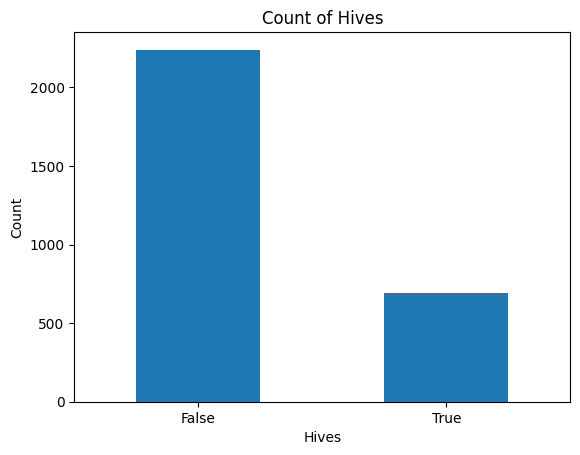

In [ ]:
data_final_ver['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


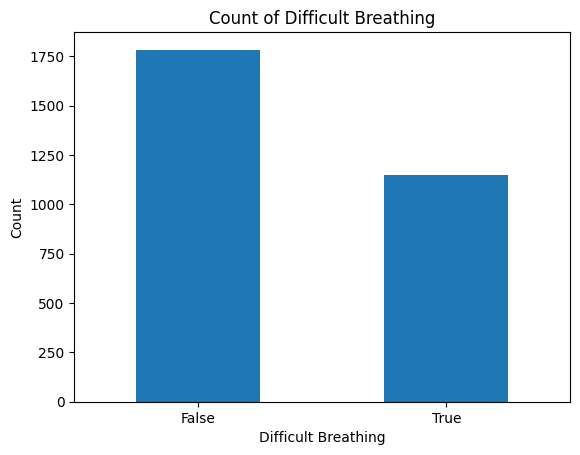

In [ ]:
data_final_ver['Difficult Breathing'].value_counts().plot(kind='bar')
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


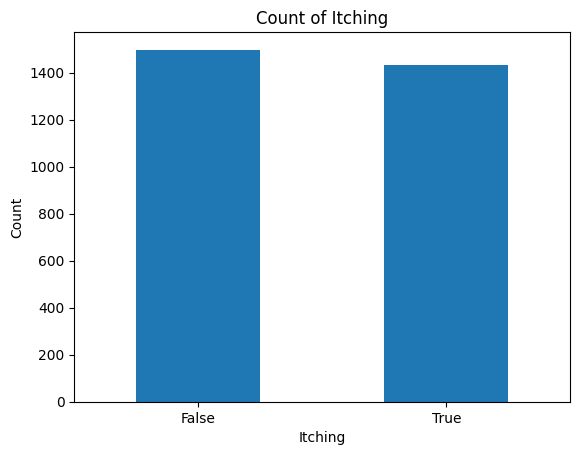

In [ ]:
data_final_ver['Itching'].value_counts().plot(kind='bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


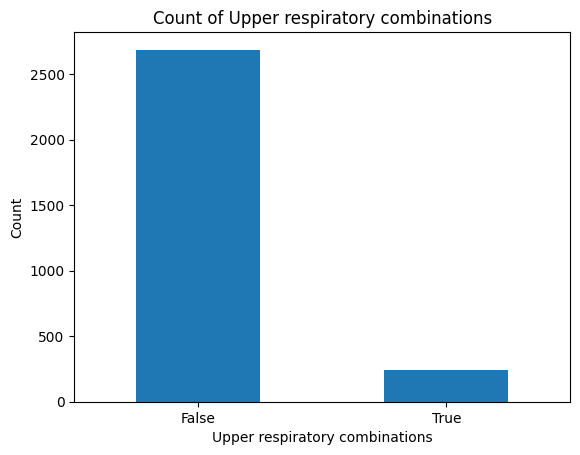

In [ ]:
data_final_ver['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


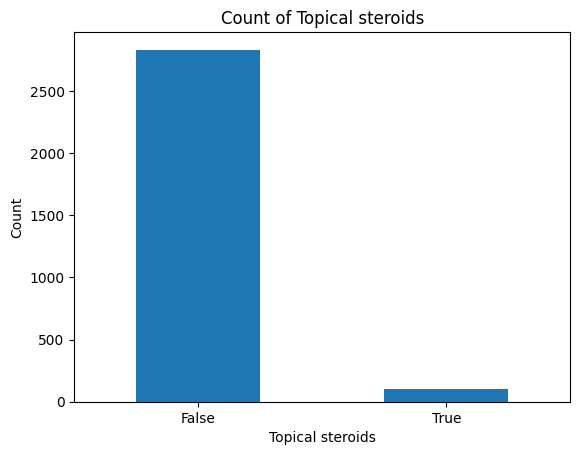

In [ ]:
data_final_ver['Topical steroids'].value_counts().plot(kind='bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


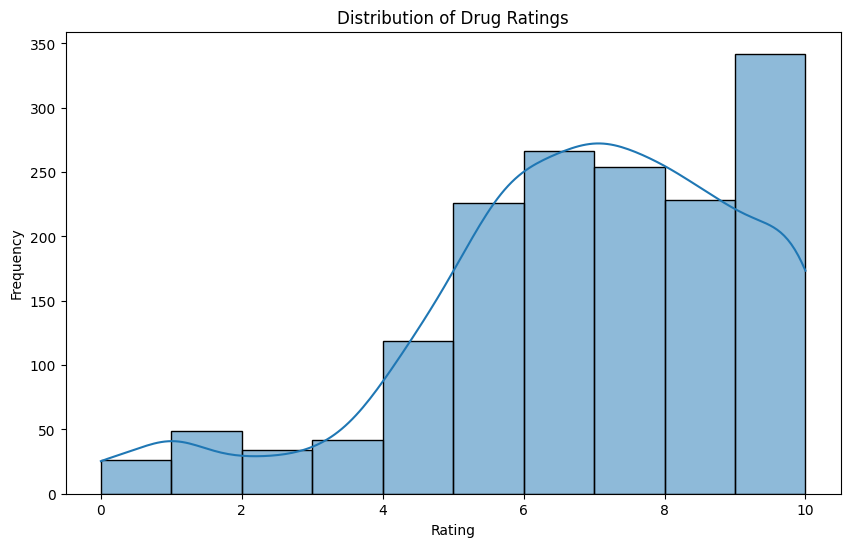

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

ANALYSING RELATIONSHIP

In [ ]:
#top drugs
top_drugs = df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(

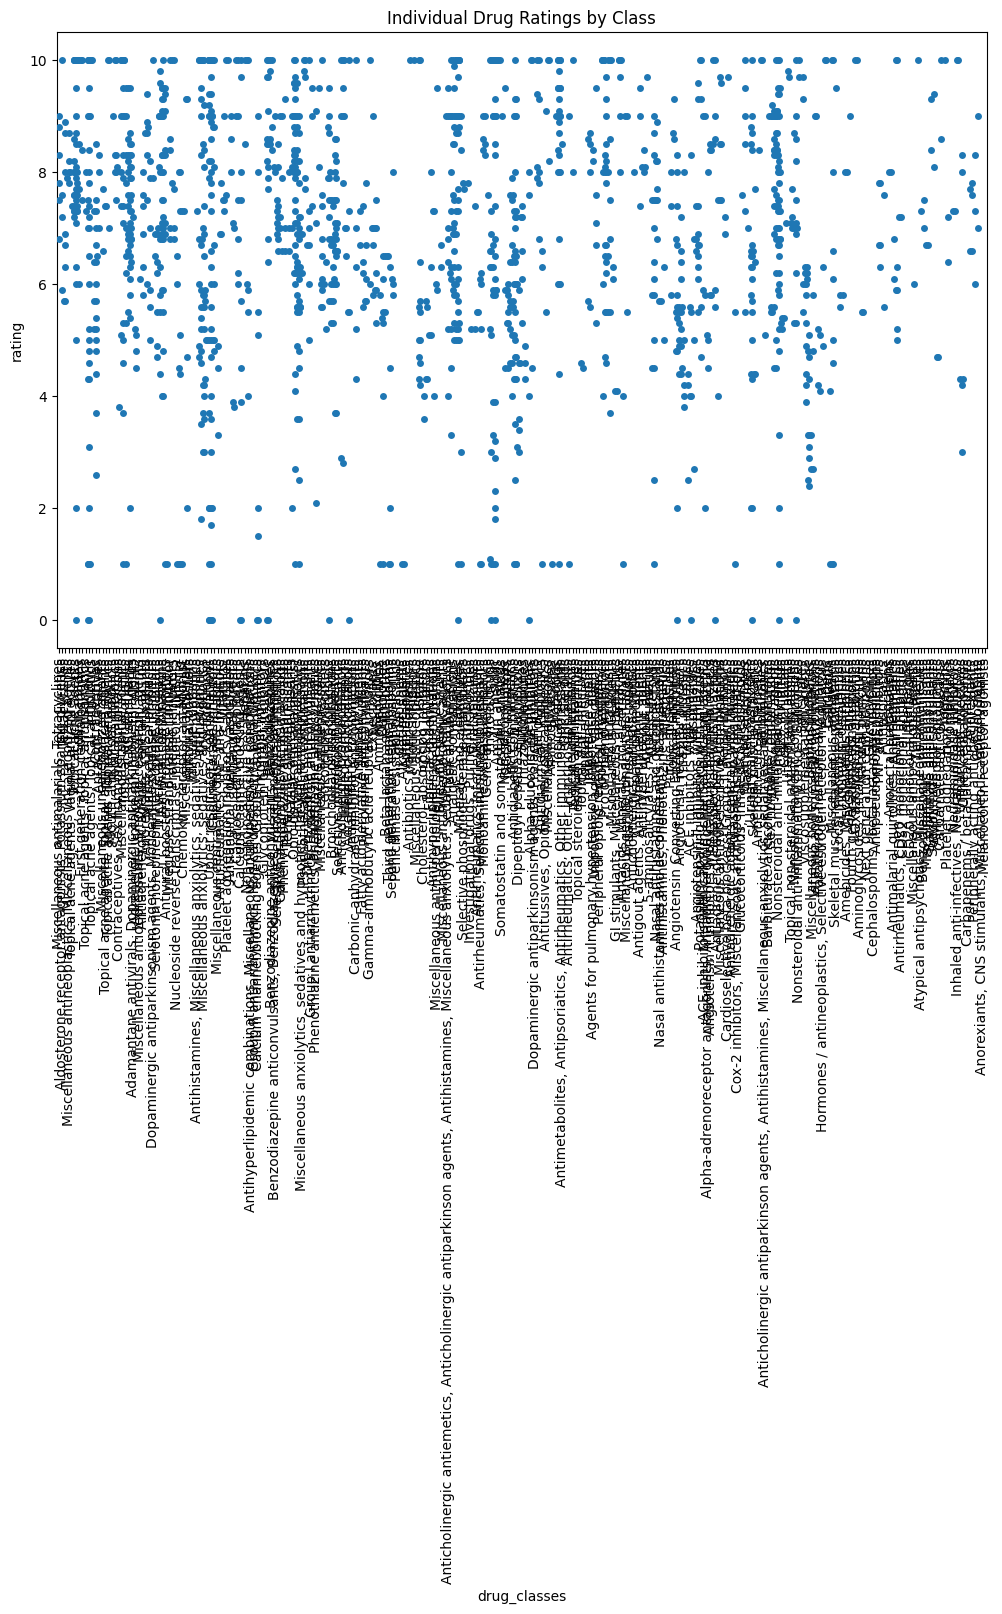

In [ ]:
# swarmplot of ratings by drug class
plt.figure(figsize=(12, 8))
sns.swarmplot(x='drug_classes', y='rating', data=data_final_ver)
plt.xticks(rotation=90)
plt.title('Individual Drug Ratings by Class')
plt.show()

In [ ]:
from IPython.display import display, HTML
html_content = """ <a id='1'></a> <center> <h3 style="background-color:purple; color:white"> <br>DATA CLEANING COMPLETED <br> </h3> </center> """
display(HTML(html_content))

In [ ]:
# Convert Drug Features into a Matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Use TF-IDF for 'side_effects' (if it's in text form)
tfidf = TfidfVectorizer(stop_words='english')
side_effects_matrix = tfidf.fit_transform(data_final_ver['side_effects'])

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data_final_ver[['medical_condition', 'drug_classes']])

import scipy.sparse as sp
drug_features = sp.hstack([side_effects_matrix, encoded_features])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity
similarity_matrix = cosine_similarity(drug_features)
drug_sim_df = pd.DataFrame(similarity_matrix, index=data_final_ver['drug_name'], columns=data_final_ver['drug_name'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
drug_sim_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


drug_name,doxycycline,spironolactone,minocycline,Accutane,clindamycin,Aldactone,tretinoin,isotretinoin,Bactrim,Retin-A,...,phentermine / topiramate,Bontril PDM,chorionic gonadotropin (hcg),Lomaira,Atti-Plex P,benzphetamine,fenfluramine,Fendique ER,Imcivree,setmelanotide
drug_name,,,,,,,,,,,,,,,,,,,,,
doxycycline,1.000000,0.378738,0.506901,0.437609,0.375748,0.378415,0.384578,0.437842,0.483176,0.376330,...,0.026305,0.037482,0.028789,0.039731,0.030385,0.038945,0.060644,0.0,0.020472,0.024202
spironolactone,0.378738,1.000000,0.392039,0.379637,0.346668,0.952550,0.347732,0.379741,0.423245,0.347322,...,0.039126,0.036277,0.039271,0.046074,0.025363,0.046087,0.048511,0.0,0.004269,0.014467
minocycline,0.506901,0.392039,1.000000,0.459396,0.356269,0.391622,0.362260,0.459678,0.477785,0.359222,...,0.050070,0.039747,0.033349,0.044912,0.029382,0.039491,0.061949,0.0,0.011459,0.028348
Accutane,0.437609,0.379637,0.459396,1.000000,0.361240,0.379308,0.359387,0.985152,0.426780,0.349485,...,0.089614,0.039526,0.032066,0.048282,0.026627,0.045209,0.071295,0.0,0.020240,0.023420
clindamycin,0.375748,0.346668,0.356269,0.361240,1.000000,0.346573,0.445134,0.361303,0.379292,0.383202,...,0.005683,0.011894,0.011173,0.018612,0.014268,0.016195,0.016036,0.0,0.008028,0.016850


DRUG RECOMMENDATION

The function can recommend drugs based on exact or partial matches to the input drug name.
It returns the top N similar drugs based on their similarity scores.

In [ ]:
def recommend_drugs(input_drug, top_n=5):
    """
    Recommend top N most similar drugs based on features.
    """
    if input_drug not in drug_sim_df.index:
        return "Drug not found in dataset."

    similar_drugs = drug_sim_df[input_drug].sort_values(ascending=False)[1:top_n+1]
    return similar_drugs

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(recommend_drugs('Paracetamol', top_n=5))

drug_name
Atasol      0.717973
Genebs      0.717973
Aminofen    0.717973
Dolono      0.717973
Abenol      0.717973
Name: Paracetamol, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(drug_features.shape)

(2931, 6083)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(recommend_drugs('Ibuprofen', top_n=5))
print(recommend_drugs('Aspirin', top_n=5))

Drug not found in dataset.
Drug not found in dataset.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert sparse matrix (if applicable) to dense format for viewing
drug_features_df = pd.DataFrame(drug_features.toarray(), index=data_final_ver['drug_name'])
print(drug_features_df.head())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                0     1     2     3     4     5     6     7     8     9     \
drug_name                                                                    
doxycycline      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
spironolactone   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
minocycline      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Accutane         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
clindamycin      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                ...  6073  6074  6075  6076  6077  6078  6079  6080  6081  \
drug_name       ...                                                         
doxycycline     ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
spironolactone  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
minocycline     ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Accutane        ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

In [ ]:
#print(data_final_ver['drug_name'].unique())
print(data_final_ver['drug_name'].unique()[:100])

['doxycycline' 'spironolactone' 'minocycline' 'Accutane' 'clindamycin'
 'Aldactone' 'tretinoin' 'isotretinoin' 'Bactrim' 'Retin-A' 'Aczone'
 'benzoyl peroxide' 'Differin' 'Epiduo' 'adapalene' 'cephalexin' 'Doryx'
 'tetracycline' 'Septra' 'Solodyn' 'Tazorac' 'Vibramycin' 'Acticlate'
 'benzoyl peroxide / clindamycin' 'Doxy 100' 'Keflex'
 'sulfamethoxazole / trimethoprim' 'Benzaclin' 'Monodox' 'Targadox'
 'Adoxa' 'Adoxa CK' 'Adoxa Pak' 'Adoxa TT' 'Avidoxy' 'Bactrim DS'
 'Cleocin T' 'Clindagel' 'Doryx MPC' 'erythromycin' 'Morgidox' 'Oraxyl'
 'Claravis' 'Clinda-Derm' 'Evoclin' 'Minocin' 'Yaz'
 'adapalene / benzoyl peroxide' 'Clindacin ETZ' 'Clindacin P'
 'Clindacin PAC' 'ClindaReach Pledget' 'Clindets' 'Milk of Magnesia'
 'Septra DS' 'Yasmin' 'Ziana' 'Absorica' 'Acanya' 'Amnesteem'
 'azelaic acid' 'Co-trimoxazole' 'dapsone' 'Duac' 'Emcin Clear'
 'Epiduo Forte' 'Erygel' 'Ery Pads' 'Myorisan' 'Onexton'
 "Phillips' Milk of Magnesia" 'salicylic acid' 'Spotex' 'Theramycin Z'
 'Absorica LD' 'Achr

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(recommend_drugs('setmelanotide', top_n=3))

drug_name
Imcivree    0.734375
Contrave    0.381356
Qsymia      0.376462
Name: setmelanotide, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def recommend_drugs(input_drug, top_n=5):
    """
    Recommend top N most similar drugs based on features.
    Now supports partial matches.
    """
    input_drug = input_drug.lower().strip()

    if input_drug in drug_sim_df.index:
        return drug_sim_df[input_drug].sort_values(ascending=False)[1:top_n+1]

    # Try to find partial matches
    matching_drugs = [drug for drug in drug_sim_df.index if input_drug in drug.lower()]

    if matching_drugs:
        print(f"Found similar match: {matching_drugs[0]}")
        return drug_sim_df[matching_drugs[0]].sort_values(ascending=False)[1:top_n+1]

    return "Drug not found in dataset."

# Test with partial names
print(recommend_drugs('ibuprofen', top_n=5))
print(recommend_drugs('aspirin', top_n=5))

drug_name
Advil                       0.964319
Motrin IB                   0.933561
diclofenac / misoprostol    0.930020
naproxen                    0.927757
Aleve                       0.925055
Name: ibuprofen, dtype: float64
drug_name
Arthritis Pain                       0.893840
Vazalore                             0.865141
Ecotrin                              0.865141
Aspir-Low                            0.860095
Bayer Aspirin Extra Strength Plus    0.851459
Name: aspirin, dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_final_ver.columns

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'activity', 'rx_otc', 'pregnancy_category', 'csa',
       'alcohol', 'related_drugs', 'medical_condition_description', 'rating',
       'no_of_reviews', 'drug_link', 'medical_condition_url', 'Hives',
       'Difficult Breathing', 'Itching', 'Upper respiratory combinations',
       'Topical steroids', 'Topical acne agents', 'Pain', 'Colds & Flu',
       'Acne'],
      dtype='object')

DRUG RECOMMENDATION FOR HEALTH ISSUES

This system focuses more on minimizing side effects while ensuring the drug is effective.


the first system is more about getting the best treatment, while the second one focuses on avoiding unwanted side effects.

In [ ]:
import pandas as pd

def recommend_drugs_for_condition(condition, top_n=5):

    condition_column = condition.replace(" ", "_")

    # Filter drugs by the condition
    condition_drugs = data_final_ver[data_final_ver[condition_column] == 1]

    if condition_drugs.empty:
        return "No drugs found for this condition."

    # Rank drugs by rating and side effects (assumes lower side effects are better)
    condition_drugs['side_effect_score'] = condition_drugs['side_effects'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
    condition_drugs = condition_drugs.sort_values(by=['rating', 'side_effect_score'], ascending=[False, True])

    return condition_drugs[['drug_name', 'rating', 'side_effect_score']].head(top_n)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(recommend_drugs_for_condition('Pain', top_n=5))

                                              drug_name  rating  \
2412                                           AneCream    10.0   
2416                                            Bactine    10.0   
2441                                    Medi-Quik Spray    10.0   
2399                                            Vitapap    10.0   
2490  capsaicin / lidocaine / menthol / methyl salic...    10.0   

      side_effect_score  
2412                  8  
2416                  8  
2441                  8  
2399                  9  
2490                 10  


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-79-29a6a532389d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_drugs['side_effect_score'] = condition_drugs['side_effects'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


In [ ]:
print(recommend_drugs_for_condition('Acne', top_n=5))

                 drug_name  rating  side_effect_score
67                Ery Pads    10.0                  1
206  salicylic acid/sulfur    10.0                  5
231            trifarotene    10.0                  6
219       Sulfacleanse 8/4    10.0                  7
77                   Acnex    10.0                  8


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-79-29a6a532389d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_drugs['side_effect_score'] = condition_drugs['side_effects'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


**END**